# SQL - Commodity Trading Simulation

---



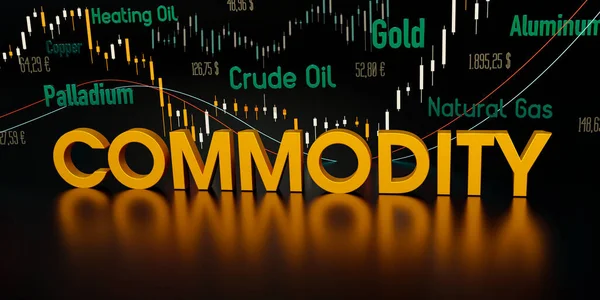



---
---

The code illustrates a simulation for managing and analyzing a dataset related to global commodity trading in SQL.
The dataset, sourced from Kaggle's "Global Commodity Trade Statistics," contains information spanning over three decades of international trade flows.


Summary of code:
1.  **Data Loading and Preprocessing:** Skills in loading and preprocessing data using Python and pandas, essential step in any data science workflow.
2.  **Database Management**: Handling databases with SQL, including table creation, data insertion, and schema inspection.
3.  **SQL Querying:** Querying to extract, filter, and analyze data.
4.  **Data Analysis:** Ability to perform both basic and complex data analyses, signifying a thorough understanding of SQL tools and data analysis techniques.

Project: KEYTEO

Author: Jean-François Berger-Lefébure

Date: January 2024

---
---


    
    
    

**Commandes SQL used:**

*   SELECT
*   GROUP BY
*   INNER JOIN
*   LEFT JOIN
*   WHERE
*   LIMIT
*   CREATE TABLE
*   INSERT INTO
*   COUNT
*   DISTINCT
*   ROUND
*   AVG
*   MIN
*   MAX
*   SUM
*   CASE
*   SUM
*   PRAGMA
*   ORDER BY
*   HAVING
*   EXISTS
*   CREATE TRIGGER
*   AFTER INSERT

# 1. System initialization

### Google Drive connexion

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Librairies installation

In [2]:
!pip install --user ipython-sql
!pip install pandas sqlalchemy
%load_ext sql
%sql sqlite:///ma_base_de_donnees.db

import pandas as pd
from sqlalchemy import create_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00


### Laoding dataset "Commodity trading"

Global Commodity Trade Statistics

Three decades of global trade flows

https://www.kaggle.com/datasets/unitednations/global-commodity-trade-statistics/data





In [3]:
df = pd.read_csv("/content/drive/MyDrive/commodity_trade_statistics_data.csv")

engine = create_engine("sqlite:///ma_base_de_donnees.db")

df.to_sql("Data", con=engine, index=False, if_exists="replace")

<ipython-input-3-c0cd04aa087a>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/commodity_trade_statistics_data.csv")


8225871

# 2. Data overview

In [4]:
%%sql
SELECT * FROM Data LIMIT 5;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


In [5]:
%%sql
PRAGMA table_info(Data);

 * sqlite:///ma_base_de_donnees.db
Done.


cid,name,type,notnull,dflt_value,pk
0,country_or_area,TEXT,0,None,0
1,year,BIGINT,0,None,0
2,comm_code,TEXT,0,None,0
3,commodity,TEXT,0,None,0
4,flow,TEXT,0,None,0
5,trade_usd,BIGINT,0,None,0
6,weight_kg,FLOAT,0,None,0
7,quantity_name,TEXT,0,None,0
8,quantity,FLOAT,0,None,0
9,category,TEXT,0,None,0


In [6]:
%%sql
SELECT
    COUNT(CASE WHEN country_or_area IS NULL THEN 1 END) AS country_or_area,
    COUNT(CASE WHEN year IS NULL THEN 1 END) AS year,
    COUNT(CASE WHEN comm_code IS NULL THEN 1 END) AS comm_code,
    COUNT(CASE WHEN commodity IS NULL THEN 1 END) AS commodity,
    COUNT(CASE WHEN flow IS NULL THEN 1 END) AS flow,
    COUNT(CASE WHEN trade_usd IS NULL THEN 1 END) AS trade_usd,
    COUNT(CASE WHEN weight_kg IS NULL THEN 1 END) AS weight_kg,
    COUNT(CASE WHEN quantity_name IS NULL THEN 1 END) AS quantity_name,
    COUNT(CASE WHEN quantity IS NULL THEN 1 END) AS quantity,
    COUNT(CASE WHEN category IS NULL THEN 1 END) AS category
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,0,0,0,0,0,128475,0,304857,0


# 3. Tables creation

## Creating a specific table for Switzerland activities

In [7]:
%%sql
CREATE TABLE Switzerland_activity (
  city VARCHAR(30),
  canton VARCHAR(30),
  activity VARCHAR(100),
  PRIMARY KEY(city)
);

 * sqlite:///ma_base_de_donnees.db
Done.


[]

In [8]:
%%sql
INSERT INTO Switzerland_activity (city, canton, activity) VALUES
('Berne', 'Bern', '10_cereals'),
('Zurich', 'Zurich', '18_cocoa_and_cocoa_preparations'),
('Lucerne', 'Luzern', '05_products_of_animal_origin_nes'),
('Geneva', 'Geneva', '22_beverages_spirits_and_vinegar'),
('Basel', 'Basel-Stadt', '30_pharmaceutical_products'),
('Lausanne', 'Vaud', '84_nuclear_reactors_boilers_machinery_etc'),
('Winterthur', 'Zurich', '85_electrical_electronic_equipment'),
('Saint-Gall', 'St. Gallen', '91_clocks_and_watches_and_parts_thereof'),
('Lugano', 'Lugano', '91_clocks_and_watches_and_parts_thereof'),
('Bienne', 'Bienne', '91_clocks_and_watches_and_parts_thereof');


 * sqlite:///ma_base_de_donnees.db
10 rows affected.


[]

In [9]:
%%sql
SELECT * FROM Switzerland_activity

 * sqlite:///ma_base_de_donnees.db
Done.


city,canton,activity
Berne,Bern,10_cereals
Zurich,Zurich,18_cocoa_and_cocoa_preparations
Lucerne,Luzern,05_products_of_animal_origin_nes
Geneva,Geneva,22_beverages_spirits_and_vinegar
Basel,Basel-Stadt,30_pharmaceutical_products
Lausanne,Vaud,84_nuclear_reactors_boilers_machinery_etc
Winterthur,Zurich,85_electrical_electronic_equipment
Saint-Gall,St. Gallen,91_clocks_and_watches_and_parts_thereof
Lugano,Lugano,91_clocks_and_watches_and_parts_thereof
Bienne,Bienne,91_clocks_and_watches_and_parts_thereof


In [10]:
%%sql
PRAGMA table_info(Switzerland_activity);

 * sqlite:///ma_base_de_donnees.db
Done.


cid,name,type,notnull,dflt_value,pk
0,city,VARCHAR(30),0,None,1
1,canton,VARCHAR(30),0,None,0
2,activity,VARCHAR(100),0,None,0


## Creating a specific table for Traders

In [11]:
%%sql
CREATE TABLE Traders (
    trader_id INT PRIMARY KEY,
    trader_name VARCHAR(255),
    city VARCHAR(100),
    contact_email VARCHAR(100),
    contact_phone VARCHAR(100)
);

 * sqlite:///ma_base_de_donnees.db
Done.


[]

In [12]:
%%sql
INSERT INTO Traders (trader_id, trader_name, city, contact_email, contact_phone) VALUES
(1, 'Trader 1', 'Zurich', 'trader1@zurich.com', '123-456-7890'),
(2, 'Trader 2', 'Geneva', 'trader2@geneva.com', '234-567-8901'),
(3, 'Trader 3', 'Basel', 'trader3@basel.com', '345-678-9012'),
(4, 'Trader 4', 'Lausanne', 'trader4@lausanne.com', '456-789-0123'),
(5, 'Trader 5', 'Berne', 'trader5@bern.com', '567-890-1234'),
(6, 'Trader 6', 'Winterthur', 'trader6@winterthur.com', '678-901-2345'),
(7, 'Trader 7', 'Lucerne', 'trader7@lucerne.com', '789-012-3456'),
(8, 'Trader 8', 'Saint-Gall', 'trader8@stgallen.com', '890-123-4567'),
(9, 'Trader 9', 'Lugano', 'trader9@lugano.com', '901-234-5678'),
(10, 'Trader 10', 'Bienne', 'trader10@biel.com', '012-345-6789'
);

 * sqlite:///ma_base_de_donnees.db
10 rows affected.


[]

In [13]:
%%sql
SELECT * FROM Traders

 * sqlite:///ma_base_de_donnees.db
Done.


trader_id,trader_name,city,contact_email,contact_phone
1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
2,Trader 2,Geneva,trader2@geneva.com,234-567-8901
3,Trader 3,Basel,trader3@basel.com,345-678-9012
4,Trader 4,Lausanne,trader4@lausanne.com,456-789-0123
5,Trader 5,Berne,trader5@bern.com,567-890-1234
6,Trader 6,Winterthur,trader6@winterthur.com,678-901-2345
7,Trader 7,Lucerne,trader7@lucerne.com,789-012-3456
8,Trader 8,Saint-Gall,trader8@stgallen.com,890-123-4567
9,Trader 9,Lugano,trader9@lugano.com,901-234-5678
10,Trader 10,Bienne,trader10@biel.com,012-345-6789


## Creating by duplication a specific table for Switzerland country

In [14]:
%%sql
DROP TABLE IF EXISTS Switzerland_filter;
CREATE TABLE Switzerland_filter (
    country_or_area TEXT,
    year INTEGER,
    comm_code INTEGER,
    commodity TEXT,
    flow TEXT,
    trade_usd INTEGER,
    weight_kg REAL,
    quantity_name TEXT,
    quantity REAL,
    category TEXT
);


 * sqlite:///ma_base_de_donnees.db
Done.
Done.


[]

In [15]:
%%sql
INSERT INTO Switzerland_filter
SELECT *
FROM Data
WHERE country_or_area = 'Switzerland';

 * sqlite:///ma_base_de_donnees.db
30893 rows affected.


[]

In [16]:
%%sql
SELECT * FROM Switzerland_filter
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Switzerland,2016,10111,"Horses, live pure-bred breeding",Export,1551336,102081.0,Number of items,214.0,01_live_animals
Switzerland,2016,10111,"Horses, live pure-bred breeding",Import,3583971,105987.0,Number of items,218.0,01_live_animals
Switzerland,2016,10119,"Horses, live except pure-bred breeding",Export,20938835,531678.0,Number of items,1170.0,01_live_animals
Switzerland,2016,10119,"Horses, live except pure-bred breeding",Import,55535094,1692698.0,Number of items,3713.0,01_live_animals
Switzerland,2016,10120,"Asses, mules and hinnies, live",Export,37708,9000.0,Number of items,28.0,01_live_animals
Switzerland,2016,10120,"Asses, mules and hinnies, live",Import,79076,18645.0,Number of items,79.0,01_live_animals
Switzerland,2016,10210,"Bovine animals, live pure-bred breeding",Export,454795,74665.0,Number of items,171.0,01_live_animals
Switzerland,2016,10210,"Bovine animals, live pure-bred breeding",Import,3299275,884382.0,Number of items,1602.0,01_live_animals
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,59986,22200.0,Number of items,70.0,01_live_animals
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,5443459,1382947.0,Number of items,3038.0,01_live_animals


In [17]:
%%sql
PRAGMA table_info(Switzerland_filter);

 * sqlite:///ma_base_de_donnees.db
Done.


cid,name,type,notnull,dflt_value,pk
0,country_or_area,TEXT,0,None,0
1,year,INTEGER,0,None,0
2,comm_code,INTEGER,0,None,0
3,commodity,TEXT,0,None,0
4,flow,TEXT,0,None,0
5,trade_usd,INTEGER,0,None,0
6,weight_kg,REAL,0,None,0
7,quantity_name,TEXT,0,None,0
8,quantity,REAL,0,None,0
9,category,TEXT,0,None,0


# 4. Basic queries

## Counting distinct values for different columns in the Data table

In [18]:
%%sql
SELECT
COUNT(DISTINCT country_or_area) as country_or_area,
COUNT(DISTINCT year) as year,
COUNT(DISTINCT comm_code) as code,
COUNT(DISTINCT commodity) as commodity,
COUNT(DISTINCT flow) as flow,
COUNT(DISTINCT category) as category
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,code,commodity,flow,category
209,29,5040,5031,4,98


## Calculation of the Average, Minimum, and Maximum values of 'trade_usd' in the Data table

In [19]:
%%sql
SELECT
    ROUND(AVG(trade_usd), 2) AS moyenne_trade
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


moyenne_trade
95053697.78


In [20]:
%%sql
SELECT
    MIN(trade_usd) AS minimum_trade
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


minimum_trade
1


In [21]:
%%sql
SELECT
    MAX(trade_usd) AS maximum_trade
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


maximum_trade
2443310524064


## Counting Null values in the "trade_usd" column

In [22]:
%%sql
SELECT
    SUM(CASE WHEN trade_usd IS NULL
    THEN 1
    ELSE 0
    END) AS nb_null_trade_usd
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


nb_null_trade_usd
0


## List of Distinct categories in the Data table

In [23]:
%%sql
SELECT
    DISTINCT category
FROM Data;

 * sqlite:///ma_base_de_donnees.db
Done.


category
01_live_animals
02_meat_and_edible_meat_offal
03_fish_crustaceans_molluscs_aquatic_invertebrates_ne
04_dairy_products_eggs_honey_edible_animal_product_nes
05_products_of_animal_origin_nes
06_live_trees_plants_bulbs_roots_cut_flowers_etc
07_edible_vegetables_and_certain_roots_and_tubers
08_edible_fruit_nuts_peel_of_citrus_fruit_melons
09_coffee_tea_mate_and_spices
10_cereals


## WHERE using - Filter on Switzerland country

In [38]:
%%sql
SELECT *
FROM Data
WHERE country_or_area = "Switzerland"
LIMIT 20;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Switzerland,2016,10111,"Horses, live pure-bred breeding",Export,1551336,102081.0,Number of items,214.0,01_live_animals
Switzerland,2016,10111,"Horses, live pure-bred breeding",Import,3583971,105987.0,Number of items,218.0,01_live_animals
Switzerland,2016,10119,"Horses, live except pure-bred breeding",Export,20938835,531678.0,Number of items,1170.0,01_live_animals
Switzerland,2016,10119,"Horses, live except pure-bred breeding",Import,55535094,1692698.0,Number of items,3713.0,01_live_animals
Switzerland,2016,10120,"Asses, mules and hinnies, live",Export,37708,9000.0,Number of items,28.0,01_live_animals
Switzerland,2016,10120,"Asses, mules and hinnies, live",Import,79076,18645.0,Number of items,79.0,01_live_animals
Switzerland,2016,10210,"Bovine animals, live pure-bred breeding",Export,454795,74665.0,Number of items,171.0,01_live_animals
Switzerland,2016,10210,"Bovine animals, live pure-bred breeding",Import,3299275,884382.0,Number of items,1602.0,01_live_animals
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,59986,22200.0,Number of items,70.0,01_live_animals
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,5443459,1382947.0,Number of items,3038.0,01_live_animals


In [39]:
%%sql
SELECT *
FROM Data
WHERE country_or_area = "Switzerland" AND category IN ("99_commodities_not_specified_according_to_kind", "10_cereals")
LIMIT 20;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Switzerland,2016,100110,Durum wheat,Import,21505222,66981669.0,Weight in kilograms,66981669.0,10_cereals
Switzerland,2016,100110,Durum wheat,Export,1605103,6278065.0,Weight in kilograms,6278065.0,10_cereals
Switzerland,2016,100190,"Wheat except durum wheat, and meslin",Import,111010289,417808199.0,Weight in kilograms,417808199.0,10_cereals
Switzerland,2016,100190,"Wheat except durum wheat, and meslin",Export,194405,212228.0,Weight in kilograms,212228.0,10_cereals
Switzerland,2016,100200,Rye,Import,1180011,2780447.0,Weight in kilograms,2780447.0,10_cereals
Switzerland,2016,100200,Rye,Export,31,5.0,Weight in kilograms,5.0,10_cereals
Switzerland,2016,100300,Barley,Import,8890250,34153473.0,Weight in kilograms,34153473.0,10_cereals
Switzerland,2016,100300,Barley,Export,256543,436960.0,Weight in kilograms,436960.0,10_cereals
Switzerland,2016,100400,Oats,Import,13651650,50128488.0,Weight in kilograms,50128488.0,10_cereals
Switzerland,2016,100400,Oats,Export,6900,8120.0,Weight in kilograms,8120.0,10_cereals


# 5. Joins queries

In [26]:
%%sql
SELECT *
FROM Switzerland_filter
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Switzerland,2016,10111,"Horses, live pure-bred breeding",Export,1551336,102081.0,Number of items,214.0,01_live_animals
Switzerland,2016,10111,"Horses, live pure-bred breeding",Import,3583971,105987.0,Number of items,218.0,01_live_animals
Switzerland,2016,10119,"Horses, live except pure-bred breeding",Export,20938835,531678.0,Number of items,1170.0,01_live_animals
Switzerland,2016,10119,"Horses, live except pure-bred breeding",Import,55535094,1692698.0,Number of items,3713.0,01_live_animals
Switzerland,2016,10120,"Asses, mules and hinnies, live",Export,37708,9000.0,Number of items,28.0,01_live_animals
Switzerland,2016,10120,"Asses, mules and hinnies, live",Import,79076,18645.0,Number of items,79.0,01_live_animals
Switzerland,2016,10210,"Bovine animals, live pure-bred breeding",Export,454795,74665.0,Number of items,171.0,01_live_animals
Switzerland,2016,10210,"Bovine animals, live pure-bred breeding",Import,3299275,884382.0,Number of items,1602.0,01_live_animals
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,59986,22200.0,Number of items,70.0,01_live_animals
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,5443459,1382947.0,Number of items,3038.0,01_live_animals


In [27]:
%%sql
SELECT *
FROM Switzerland_filter Sf
INNER JOIN Switzerland_activity Sa  ON Sa.activity = Sf.category
INNER JOIN Traders T ON T.City = Sa.City
WHERE T.trader_id = "1"
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,city,canton,activity,trader_id,trader_name,city_1,contact_email,contact_phone
Switzerland,2016,180100,"Cocoa beans, whole or broken, raw or roasted",Import,127789733,38576807.0,Weight in kilograms,38576807.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180100,"Cocoa beans, whole or broken, raw or roasted",Export,1899168,331394.0,Weight in kilograms,331394.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180200,"Cocoa shells, husks, skins and waste",Import,132075,988691.0,Weight in kilograms,988691.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180200,"Cocoa shells, husks, skins and waste",Export,36832,336365.0,Weight in kilograms,336365.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180310,Cocoa paste not defatted,Import,43260645,9264354.0,Weight in kilograms,9264354.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180310,Cocoa paste not defatted,Export,66735982,13293418.0,Weight in kilograms,13293418.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180320,Cocoa paste wholly or partly defatted,Import,5943,447.0,Weight in kilograms,447.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180320,Cocoa paste wholly or partly defatted,Export,650,8.0,Weight in kilograms,8.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180400,"Cocoa butter, fat, oil",Import,177670989,27546139.0,Weight in kilograms,27546139.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890
Switzerland,2016,180400,"Cocoa butter, fat, oil",Export,1644204,202577.0,Weight in kilograms,202577.0,18_cocoa_and_cocoa_preparations,Zurich,Zurich,18_cocoa_and_cocoa_preparations,1,Trader 1,Zurich,trader1@zurich.com,123-456-7890


In [40]:
%%sql
SELECT Sf.*
FROM Switzerland_filter Sf
LEFT JOIN Switzerland_activity Sa ON Sa.activity = Sf.category
WHERE Sa.canton = "Bern"
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Switzerland,1988,100110,Durum wheat,Import,18375112,98544944.0,Weight in kilograms,98544944.0,10_cereals
Switzerland,1988,100190,"Wheat except durum wheat, and meslin",Export,10057,9340.0,Weight in kilograms,9340.0,10_cereals
Switzerland,1988,100190,"Wheat except durum wheat, and meslin",Import,21367812,129371680.0,Weight in kilograms,129371680.0,10_cereals
Switzerland,1988,100200,Rye,Export,283,378.0,Weight in kilograms,378.0,10_cereals
Switzerland,1988,100200,Rye,Import,3009040,20323512.0,Weight in kilograms,20323512.0,10_cereals
Switzerland,1988,100300,Barley,Export,230,171.0,Weight in kilograms,171.0,10_cereals
Switzerland,1988,100300,Barley,Import,21967030,184787968.0,Weight in kilograms,184787968.0,10_cereals
Switzerland,1988,100400,Oats,Export,257,215.0,Weight in kilograms,215.0,10_cereals
Switzerland,1988,100400,Oats,Import,21038764,118303416.0,Weight in kilograms,118303416.0,10_cereals
Switzerland,1988,100510,Maize (corn) seed,Export,68402,5804.0,Weight in kilograms,5804.0,10_cereals


# 6. Advanced queries

#### Querying Trading Activities in Bern

---
The purpose of this query is to extract and display a maximum of 10 records that combine information from two datasets, focusing specifically on trading activities in the city of Bern. It merges data to show how specific activities in Bern align with broader trade categories, providing a targeted view of trade in this particular city.

In [56]:
%%sql
SELECT *
FROM Switzerland_filter
JOIN Switzerland_activity ON Switzerland_activity.activity = Switzerland_filter.category
WHERE Switzerland_activity.city = "Berne"
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,city,canton,activity
Switzerland,2016,100110,Durum wheat,Import,21505222,66981669.0,Weight in kilograms,66981669.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100110,Durum wheat,Export,1605103,6278065.0,Weight in kilograms,6278065.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100190,"Wheat except durum wheat, and meslin",Import,111010289,417808199.0,Weight in kilograms,417808199.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100190,"Wheat except durum wheat, and meslin",Export,194405,212228.0,Weight in kilograms,212228.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100200,Rye,Import,1180011,2780447.0,Weight in kilograms,2780447.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100200,Rye,Export,31,5.0,Weight in kilograms,5.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100300,Barley,Import,8890250,34153473.0,Weight in kilograms,34153473.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100300,Barley,Export,256543,436960.0,Weight in kilograms,436960.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100400,Oats,Import,13651650,50128488.0,Weight in kilograms,50128488.0,10_cereals,Berne,Bern,10_cereals
Switzerland,2016,100400,Oats,Export,6900,8120.0,Weight in kilograms,8120.0,10_cereals,Berne,Bern,10_cereals


#### Analysis of High-Value Trade Years


---


The goal of this query is to identify years where total trade values exceeded 1 billion USD in the Switzerland_filter dataset. It aggregates trade data by year, calculates the total trade value for each year, and filters to show only those years with exceptionally high trade volumes. The results are ordered in descending order of trade value.

In [30]:
%%sql
SELECT year, SUM(trade_usd) AS total_trade
FROM Switzerland_filter
GROUP BY year
HAVING SUM(trade_usd) > 1000000000
ORDER BY SUM(trade_usd) DESC;

 * sqlite:///ma_base_de_donnees.db
Done.


year,total_trade
2013,704933065260
2012,632196914352
2014,613315705149
2016,600242190723
2015,570690500907
2011,470348463446
2008,411315665875
2010,396460810560
2007,357856129099
2009,350919714530


#### Trading Data Linked to Basel's Activities and Traders

---

This query aims to correlate comprehensive trading data with specific activities and traders in the city of Basel. By joining data across three distinct tables, it provides a detailed snapshot, limited to the first 10 entries, that highlights how the trading categories in Basel are connected with both the city's trading activities and the associated traders.

In [31]:
%%sql
SELECT *
FROM Data
INNER JOIN Switzerland_activity Sa ON Data.category = Sa.activity
INNER JOIN Traders T ON T.City = Sa.City
WHERE T.city = 'Basel'
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,city,canton,activity,trader_id,trader_name,city_1,contact_email,contact_phone
Afghanistan,2008,300220,"Vaccines, human use",Import,19670526,53947.0,Weight in kilograms,53947.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300110,"Glands and other organs, dried, for therapeutic uses",Import,116,2.0,Weight in kilograms,2.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300190,"Heparin, salts, for therapeutic use",Import,326977,27439.0,Weight in kilograms,27439.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300210,Antisera and other blood fractions,Import,50291,7425.0,Weight in kilograms,7425.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300220,"Vaccines, human use",Export,2470,226.0,Weight in kilograms,226.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300220,"Vaccines, human use",Import,3372808,17038.0,Weight in kilograms,17038.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300239,"Vaccines, veterinary use, except foot and mouth",Import,526526,53006.0,Weight in kilograms,53006.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300310,"Penicillins or streptomycins and derivatives, in bulk",Import,314455,28647.0,Weight in kilograms,28647.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300320,"Antibiotics nes, formulated, in bulk",Import,2452067,126279.0,Weight in kilograms,126279.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012
Albania,1996,300331,"Insulin, formulated, in bulk",Import,94363,13470.0,Weight in kilograms,13470.0,30_pharmaceutical_products,Basel,Basel-Stadt,30_pharmaceutical_products,3,Trader 3,Basel,trader3@basel.com,345-678-9012


#### Identifying High-Value Trades Above Average

---

This query is designed to filter and display the top 10 records from the trading data where the trade value in USD is greater than the average trade value across all records. It provides insights into trades that are significantly higher in value than the typical trade within the dataset.

In [32]:
%%sql
SELECT *
FROM Data
WHERE trade_usd > (
    SELECT AVG(trade_usd)
    FROM Data
)
LIMIT 10;

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Algeria,2014,10290,"Bovine animals, live, except pure-bred breeding",Import,130145662,29539806.0,Number of items,5697918.0,01_live_animals
Algeria,2013,10290,"Bovine animals, live, except pure-bred breeding",Import,155527340,35829756.0,Number of items,2310077.0,01_live_animals
Algeria,2012,10290,"Bovine animals, live, except pure-bred breeding",Import,99630194,22679200.0,Number of items,942926.0,01_live_animals
Algeria,2011,10290,"Bovine animals, live, except pure-bred breeding",Import,115274509,27030448.0,Number of items,112191.0,01_live_animals
Australia,2016,10111,"Horses, live pure-bred breeding",Export,128577553,900450.0,Number of items,1882.0,01_live_animals
Australia,2016,10210,"Bovine animals, live pure-bred breeding",Export,138293019,35071238.0,Number of items,116088.0,01_live_animals
Australia,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,947455270,356789795.0,Number of items,1036209.0,01_live_animals
Australia,2016,10410,"Sheep, live",Export,162261760,87199485.0,Number of items,1870412.0,01_live_animals
Australia,2015,10111,"Horses, live pure-bred breeding",Export,116036512,982879.0,Number of items,2493.0,01_live_animals
Australia,2015,10210,"Bovine animals, live pure-bred breeding",Export,163182373,30453019.0,Number of items,96387.0,01_live_animals


#### Swiss Exports Analysis for 2016

---

Retrieve all records from the 'Data' table where Switzerland exported commodities in 2016 with a commodity code of 10290 and a trade value lower than the average trade value of Swiss exports in 2016.

In [33]:
%%sql
SELECT *
FROM Data
WHERE country_or_area = "Switzerland"
  AND year = 2016
  AND comm_code = 10290
  AND flow = "Export"
  AND trade_usd < (
    SELECT AVG(trade_usd)
    FROM Data
    WHERE country_or_area = "Switzerland"
      AND year = 2016
      AND flow = "Export"
  );

 * sqlite:///ma_base_de_donnees.db
Done.


country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
Switzerland,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,59986,22200.0,Number of items,70.0,01_live_animals


# 7.Triggers

#### SQLite Trigger for Recording Trader Actions

---

Create an SQLite trigger that records trader actions in a "trader_log" table for auditing purposes.

In [34]:
%%sql
CREATE TABLE IF NOT EXISTS trader_log (
    log_id INTEGER PRIMARY KEY,
    action VARCHAR(255),
    trader_id INT,
    trader_name VARCHAR(255),
    city VARCHAR(100),
    contact_email VARCHAR(100),
    contact_phone VARCHAR(100),
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
);

 * sqlite:///ma_base_de_donnees.db
Done.


[]

In [35]:
%%sql
CREATE TRIGGER IF NOT EXISTS trigger_new_trader
AFTER INSERT ON Traders
BEGIN
    INSERT INTO trader_log (action, trader_id, trader_name, city, contact_email, contact_phone)
    VALUES ('INSERT', NEW.trader_id, NEW.trader_name, NEW.city, NEW.contact_email, NEW.contact_phone);
END;

 * sqlite:///ma_base_de_donnees.db
Done.


[]

In [36]:
%%sql
INSERT INTO Traders (trader_id, trader_name, city, contact_email, contact_phone) VALUES
(11, 'Trader 11', 'Zug', 'trader2@zug.com', '235-567-8901');

 * sqlite:///ma_base_de_donnees.db
1 rows affected.


[]

In [37]:
%%sql
SELECT trader_name, timestamp  FROM trader_log
ORDER BY trader_log.timestamp DESC
LIMIT 1;

 * sqlite:///ma_base_de_donnees.db
Done.


trader_name,timestamp
Trader 11,2024-01-21 14:16:08


# 8. Schema

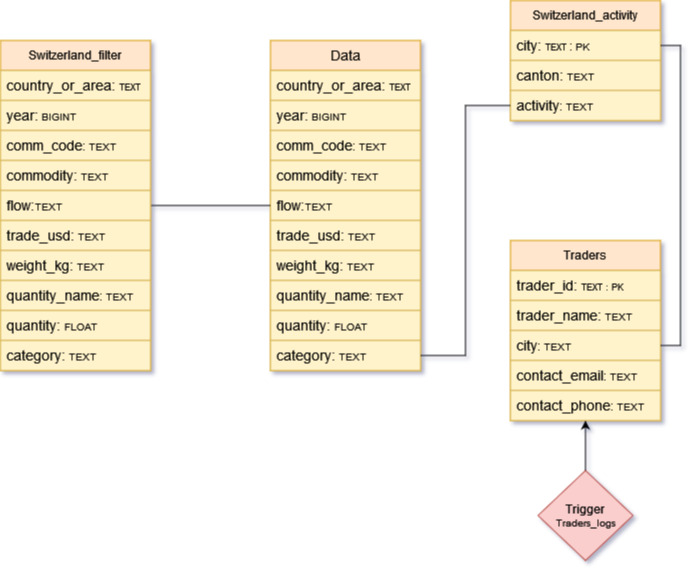